In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
df.head() # View the data

,Unnamed: 0,unit_id,inst_name,city,state,zip,accred_inst,inst_url,net_price_calc,height_cash_monitoring,...,blackNH_ugds,title4_stud_pub,title4_stud_priv,atnd_cost_acad_yr,in_st_tuition,out_st_tuition,net_tuition_rev_per_fts,inst_expend_per_fts,avg_fac_salary,full_time_faculty_pct
0,0,100654,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,0,...,NaN,592.0,NaN,22489.0,9744.0,18354.0,7413.0,5384.0,7101.0,0.7411
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,0,...,NaN,1229.0,NaN,24347.0,8568.0,19704.0,13177.0,16454.0,10717.0,0.7766
2,2,100690,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,...,NaN,NaN,5.0,17680.0,6900.0,6900.0,14273.0,4206.0,4292.0,1.0000
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,0,...,NaN,585.0,NaN,23441.0,10714.0,22362.0,8677.0,9242.0,9442.0,0.6544
4,4,100724,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,0,...,NaN,523.0,NaN,21476.0,11068.0,19396.0,10160.0,8527.0,7754.0,0.5826


In order to further explore geographical trends in racial demographics, we can plot the different percentage of students of each rate on a scatterplot by location. Grouping racial demographic by latitude and longitude is less meaningful in the US, where multiple states with a variety of socioeconomic situations exist at similar latitudes or longitudes. Instead, we can look at the demographic breakdown of universities by state.

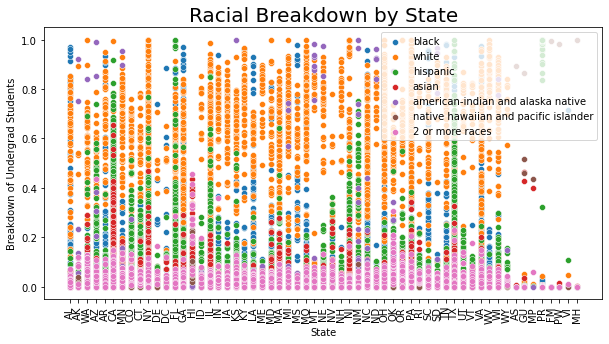

In [3]:
#get each race column as an an array
black = df.black_ugds
white = df.white_ugds
hispanic = df.hisp_ugds
asian = df.asian_ugds
aian = df.AIAN_ugds
nhpi = df.NHPI_ugds
biracial = df.birac_ugds

#create a matplotlib figure, assign title and labels
plt.figure(figsize=(10,5))
plt.title('Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.scatterplot(x=df.state, y=black)
sns.scatterplot(x=df.state, y=white)
sns.scatterplot(x=df.state, y=hispanic)
sns.scatterplot(x=df.state, y=asian)
sns.scatterplot(x=df.state, y=aian)
sns.scatterplot(x=df.state, y=nhpi)
sns.scatterplot(x=df.state, y=biracial)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])

This scatterplot is very difficult to interpret, so we will take the average within each state. This leaves us fewer data points and a basis for comparison when looking at trends in universities in different states.

In [4]:
df2 = df.filter(['black_ugds', 'white_ugds', 'hisp_ugds', 'asian_ugds', 'AIAN_ugds', 'NHPI_ugds', 'birac_ugds', 'state', 'adm_rate', 'atnd_cost_acad_yr'], axis=1)
df2 = df2.round({'latitude':1}).groupby('state').mean()

Now, if we make a similar plot to the one above, it should be clearer per state. This time, we opted to use a line plot to emphasize peaks and troughs for different states.

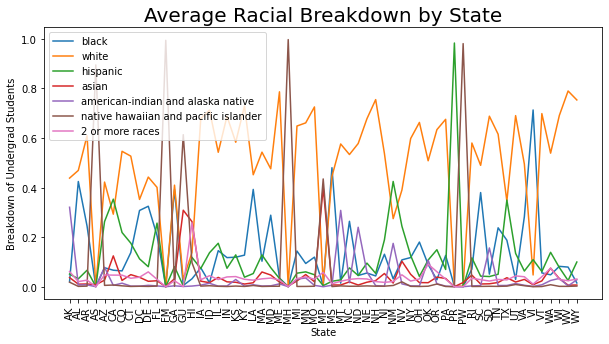

In [5]:
plt.figure(figsize=(10,5))
plt.title('Average Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.lineplot(x=df2.index, y=df2.black_ugds)
sns.lineplot(x=df2.index, y=df2.white_ugds)
sns.lineplot(x=df2.index, y=df2.hisp_ugds)
sns.lineplot(x=df2.index, y=df2.asian_ugds)
sns.lineplot(x=df2.index, y=df2.AIAN_ugds)
sns.lineplot(x=df2.index, y=df2.NHPI_ugds)
sns.lineplot(x=df2.index, y=df2.birac_ugds)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])

This information is somewhat intuitive, but helps us in our exploratory data analysis. Next, we will come up with a hypothesis about this data, and this background knowledge of race breakdown by state will come into play.

In this tutorial, we are hypothesizing that tuition rates have some relationship to the racial breakdown of universities.

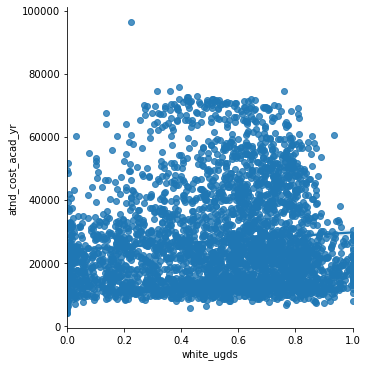

In [7]:
white_df = df.filter(["white_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='white_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

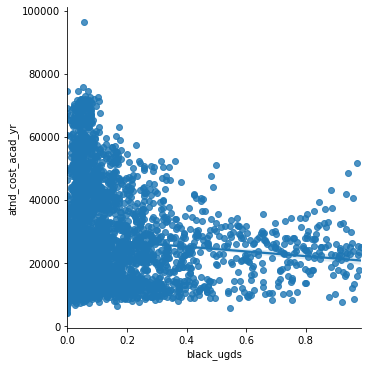

In [8]:
black_df = df.filter(["black_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='black_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

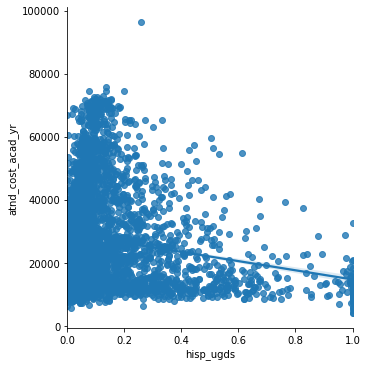

In [9]:
hisp_df = df.filter(["hisp_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='hisp_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

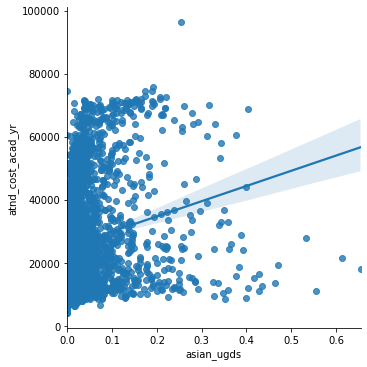

In [10]:
asian_df = df.filter(["asian_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='asian_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

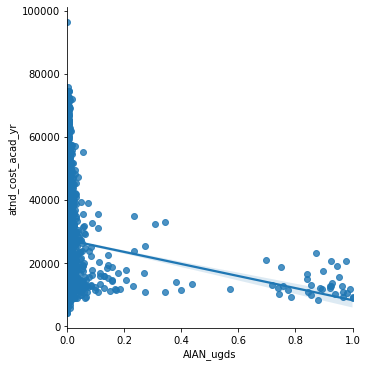

In [11]:
aian_df = df.filter(["AIAN_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='AIAN_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

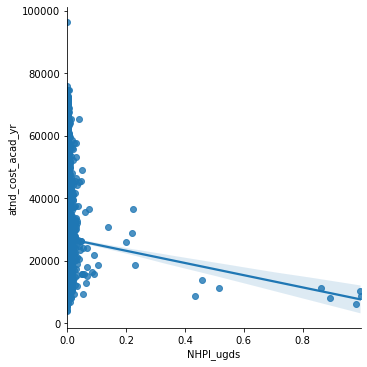

In [12]:
nhpi_df = df.filter(["NHPI_ugds","state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='NHPI_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

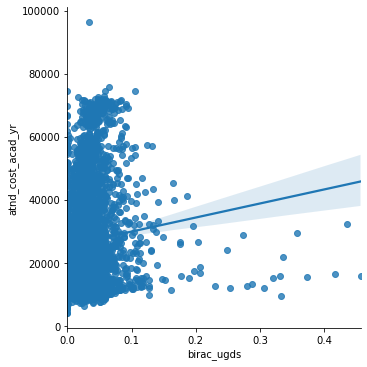

In [13]:
biracial_df = df.filter(["birac_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='birac_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

At first glance, the relationship between the racial breakdown of colleges and the attendance cost does not seem linear, if it exists at all.

In [15]:
import statsmodels.formula.api as sm

#attendance cost is predicted upon race + state + race * state.

rxn = sm.ols('adm_rate ~ black_ugds + state + black_ugds*state', data=df).fit()

summ = rxn.summary()
print(summ)
import statsmodels.formula.api as sm

                            OLS Regression Results                            
Dep. Variable:               adm_rate   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.582
Date:                Sun, 16 May 2021   Prob (F-statistic):           0.000236
Time:                        22:57:10   Log-Likelihood:                 337.51
No. Observations:                1815   AIC:                            -463.0
Df Residuals:                    1709   BIC:                             120.4
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0